In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
df=pd.read_csv('C:/Users/aksin52/Documents/Learnbay Stats ML Curriculum/diabetes.csv')

# Checking the data

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Split Dependent and Independent

In [6]:
X=df.drop(['Outcome'],axis=1)
Y=df[['Outcome']]

In [7]:
Y.mean()

Outcome    0.348958
dtype: float64

# Missing Value Check

In [8]:
X.isnull().mean()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
dtype: float64

In [14]:
X.describe(percentiles=[0.01,0.05,0.15,0.20,0.80,0.88,0.90,0.950,0.99])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
1%,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.094680,21.000000
5%,0.000000,79.000000,38.700000,0.000000,0.000000,21.800000,0.140350,21.000000
15%,1.000000,91.000000,58.000000,0.000000,0.000000,24.805000,0.192100,22.000000
20%,1.000000,95.000000,60.000000,0.000000,0.000000,25.900000,0.219400,23.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
80%,7.000000,147.000000,82.000000,35.000000,150.000000,37.800000,0.687000,42.600000


# Capping and Flooring of Outliers if Present

In [16]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [17]:
X=X.apply(lambda x: outlier_capping(x))
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.834635,121.272135,69.053385,20.433125,78.604427,31.936031,0.468461,33.205729
std,3.336808,30.807518,19.243340,15.646206,109.425722,7.712781,0.314849,11.645318
min,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.094680,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,13.000000,196.000000,106.000000,51.330000,519.900000,50.759000,1.698330,67.000000


In [18]:
X.shape

(768, 8)

# Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,Y, test_size=0.2,random_state=42)

# Check for randomness of train and test by testing the event rates across the two datasets

In [20]:
y_train.mean()

Outcome    0.350093
dtype: float64

In [29]:
y_test.mean()

Outcome    0.34632
dtype: float64

In [35]:
X_test.shape


(231, 8)

# Building the Decision Tree Model

In [77]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=7,random_state=0,min_samples_split=20)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=20, random_state=0)

# Making Class Predictions

In [78]:
y_pred=clf.predict(X_test)
y_pred_train=clf.predict(X_train)

# Model Evaluation

In [36]:
from sklearn import metrics

In [79]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Precision",metrics.precision_score(y_train,y_pred_train))
print("Recall",metrics.recall_score(y_train,y_pred_train))
print("f1_score",metrics.f1_score(y_train,y_pred_train))

Accuracy: 0.8811074918566775
Precision 0.8333333333333334
Recall 0.8215962441314554
f1_score 0.8274231678486997


In [80]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))

Accuracy: 0.7337662337662337
Precision 0.6166666666666667
Recall 0.6727272727272727
f1_score 0.6434782608695652


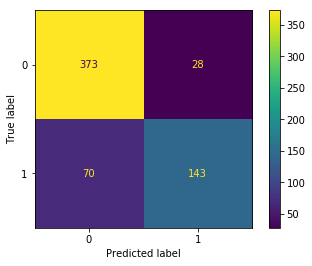

In [69]:
metrics.plot_confusion_matrix(clf,X_train,y_train)

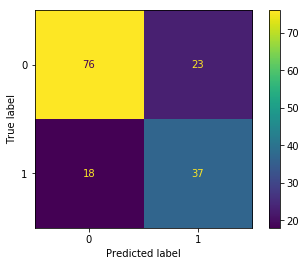

In [81]:
metrics.plot_confusion_matrix(clf,X_test,y_test)

In [49]:
metrics.roc_auc_score(y_test,y_pred)

0.7323232323232324

# Visualizing the Model Performance - Lorenz Curve

In [82]:
y_pred_prob = clf.predict_proba(X)[:, 1]
df['y_pred_P']=pd.DataFrame(y_pred_prob)
df['P_Rank_RF']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=df.groupby('P_Rank_RF')['Outcome'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank_RF',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed

,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile,lift_over_random
0,10,77,0.961039,74.0,74.0,0.276119,0.276119,0.100260,0.100260,1,2.754022
1,9,77,0.870130,67.0,141.0,0.250000,0.526119,0.100260,0.200521,2,2.623764
2,8,77,0.623377,48.0,189.0,0.179104,0.705224,0.100260,0.300781,3,2.344640
3,7,76,0.513158,39.0,228.0,0.145522,0.850746,0.098958,0.399740,4,2.128251
4,6,77,0.337662,26.0,254.0,0.097015,0.947761,0.100260,0.500000,5,1.895522
5,5,77,0.090909,7.0,261.0,0.026119,0.973881,0.100260,0.600260,6,1.622430
6,4,76,0.052632,4.0,265.0,0.014925,0.988806,0.098958,0.699219,7,1.414158
7,3,77,0.012987,1.0,266.0,0.003731,0.992537,0.100260,0.799479,8,1.241480
8,2,77,0.012987,1.0,267.0,0.003731,0.996269,0.100260,0.899740,9,1.107286
9,1,77,0.012987,1.0,268.0,0.003731,1.000000,0.100260,1.000000,10,1.000000


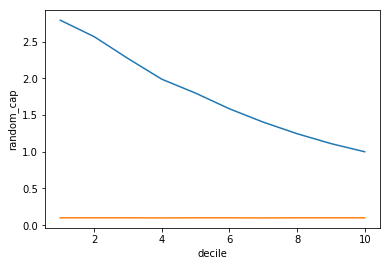

In [72]:
ax = sns.lineplot( x="decile", y="lift_over_random", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="random_cap", data=sorted_reindexed)

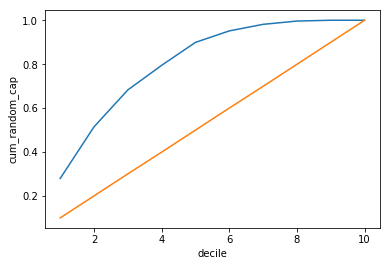

In [73]:
ax = sns.lineplot( x="decile", y="cum_event_cap", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="cum_random_cap", data=sorted_reindexed)

In [74]:
from sklearn import tree

In [75]:
import pydotplus

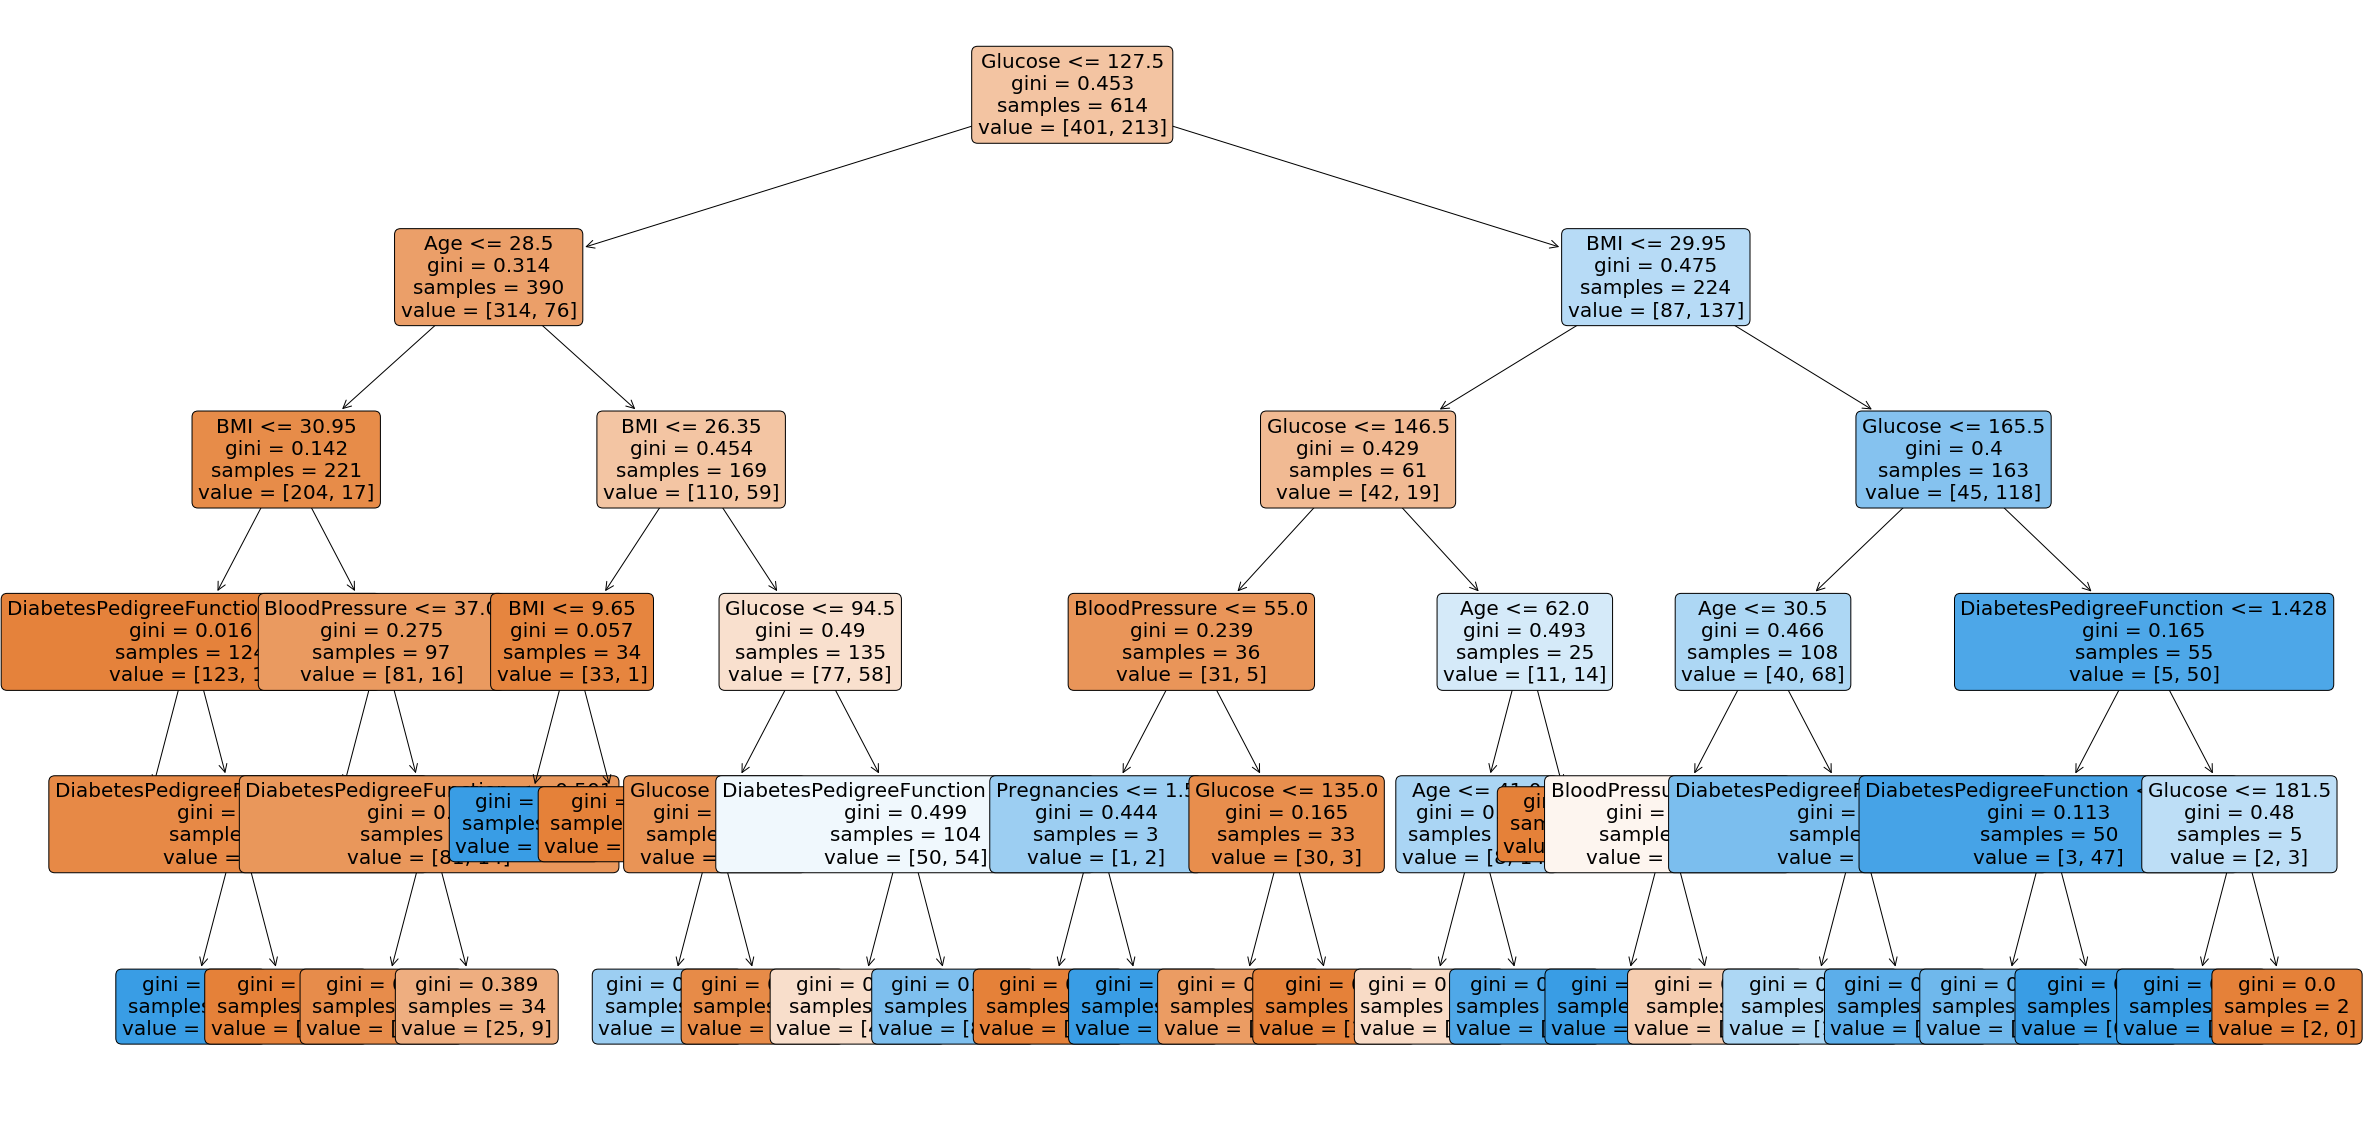

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=[40,20])
tree.plot_tree(clf,filled=True,fontsize=20,rounded=True,feature_names=X.columns)
plt.show()